# Explore here

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisológicos de sus clientes cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numerico)

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Your code here
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

Exploracion

In [4]:
total_data.shape

(1338, 7)

The DataFrame contains 1338 records (rows) and 7 variables (columns).

In [5]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [6]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [7]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.586957,0.247915,0.4,1.0
1,0.391304,0.378262,0.0,1.0
2,1.000000,0.293920,0.0,0.0
3,0.608696,0.263250,0.6,1.0
4,0.021739,0.429379,0.0,0.0


In [8]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Linear Regression model

In [9]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.608696,0.107345,0.4,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,1.0,0.119316
4,0.782609,0.148238,0.6,1.0,0.181225


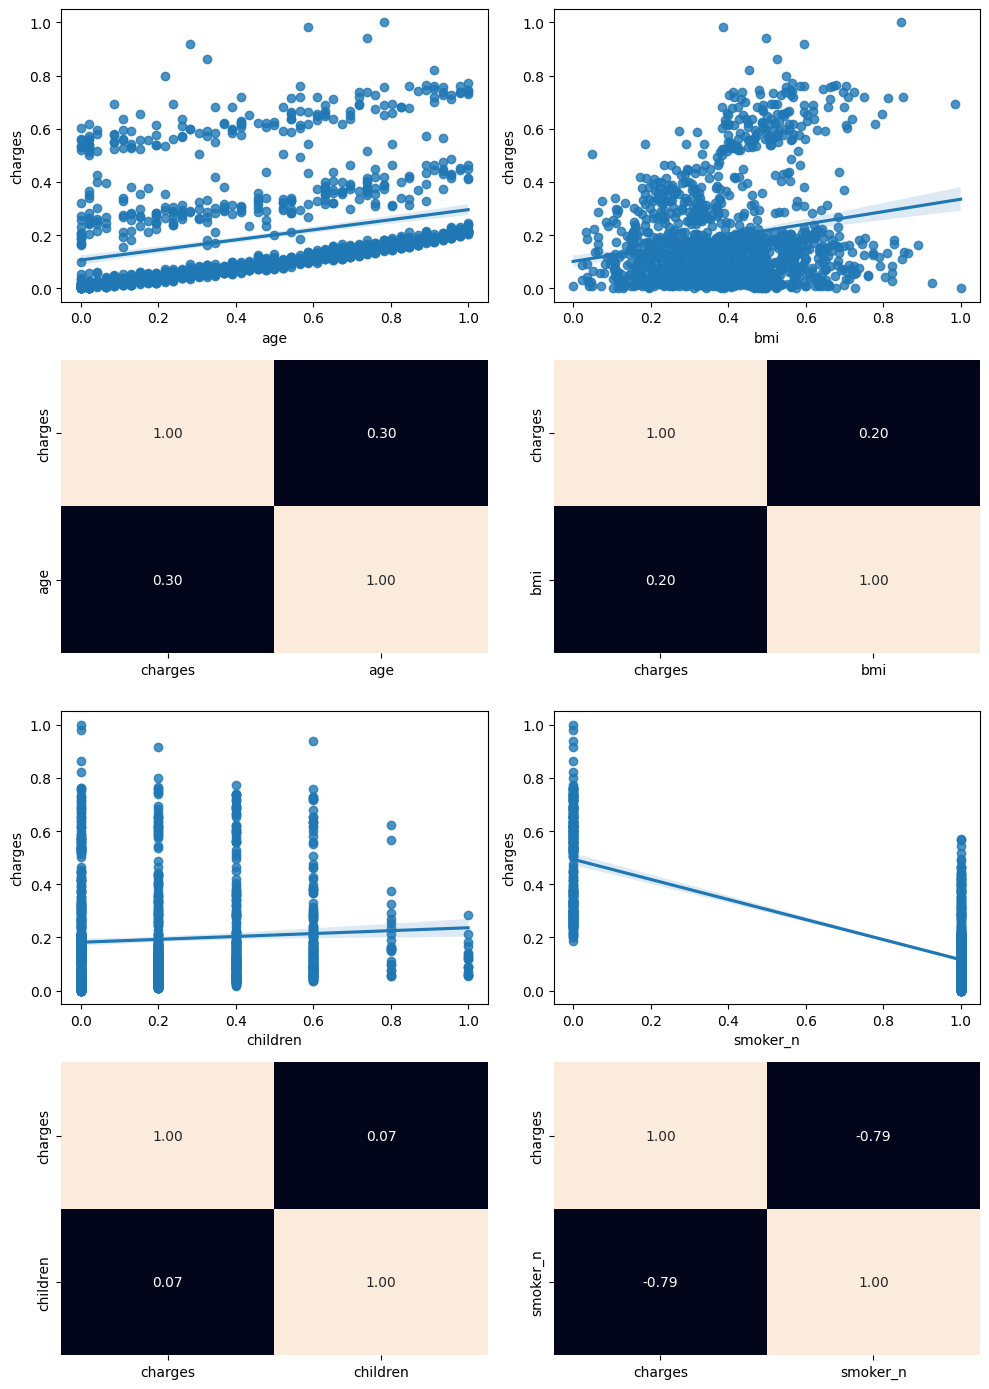

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [11]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3235318834651257
Coefficients (b1, b2): [ 0.18875573  0.19432238  0.03409496 -0.37755399]


In [14]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18582710e-01,  9.33436083e-02,  5.69402809e-01,  1.32485010e-01,
        4.11073127e-01,  1.59291645e-01, -1.56496019e-02,  2.49460673e-01,
       -6.03509954e-03,  1.60191438e-01,  4.37353262e-01,  1.30478442e-01,
        6.91908902e-02,  5.96848879e-01,  6.26363350e-01,  5.76306011e-01,
        2.26511271e-01,  5.57410487e-01,  1.30897419e-01,  4.83231717e-01,
        5.03063599e-02,  1.49193364e-01,  2.55726734e-02,  8.70515674e-02,
        1.61314900e-01,  1.81110854e-01,  2.18382771e-01,  7.88567312e-02,
        1.34239289e-01,  2.01100247e-02,  1.33269003e-01,  1.88951125e-01,
        5.71483179e-02,  3.65349560e-02,  5.90241880e-02,  1.81429430e-01,
        1.96866918e-02,  1.28258945e-01,  5.12578214e-01,  5.04797300e-01,
        5.02573471e-02,  4.96683603e-02,  2.12447777e-01,  1.63882083e-01,
        1.24627509e-01,  1.81366064e-01,  6.43036607e-02,  3.87595509e-02,
        5.51184491e-01,  1.30222489e-01,  2.36966450e-01,  2.29035057e-02,
        1.76174612e-01, -

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008658096232451859
R2 Score: 0.7811147722517886
